## Import Data

In [44]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns 
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import mean_absolute_error, root_mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
import joblib

from eosce.models import ErsiliaCompoundEmbeddings

## Ersilia Descriptor Model

In [45]:
# train_df = pd.read_csv('data/train.csv')
# test_df = pd.read_csv('data/test.csv')

In [46]:
# train_df

In [47]:
# # Function to calculate Ersilia descriptors
# def calculate_ersilia_descriptors(smiles):
#     model = ErsiliaCompoundEmbeddings()
#     embeddings = model.transform([smiles])
#     return embeddings

# # Function to preprocess data and create embeddings
# def preprocess_data(df):
#     # Get the target embeddings
#     embeddings = df.iloc[:, 2:].values
#     # create Ersilia descriptor columns
#     df['ersilia_descriptors'] = df['SMILES'].apply(calculate_ersilia_descriptors)
#     df = df.dropna()
#     # Extract the descriptors as a NumPy array
#     ersilia_descriptors = np.vstack(df['ersilia_descriptors'].values)
#     return ersilia_descriptors, embeddings

In [48]:
# # The ersilia descriptor is X, our features
# # The embeddings is y, our target variable
# X_train, y_train = preprocess_data(train_df)
# X_test, y_test = preprocess_data(test_df)

# print("The length of X_train is:", len(X_train))
# print("The length of X_test is:", len(X_test))

Save the ersilia embeddings since it takes a long time to convert them.

In [49]:
# # Specify the directory
directory = 'data/ersilia_embeddings/'

# Create the directory if it doesn't exist
os.makedirs(directory, exist_ok=True)

# # Save the variables as text files
# np.savetxt(os.path.join(directory, 'X_train_ersilia1.txt'), X_train)
# np.savetxt(os.path.join(directory, 'y_train_ersilia1.txt'), y_train)
# np.savetxt(os.path.join(directory, 'X_test_ersilia1.txt'), X_test)
# np.savetxt(os.path.join(directory, 'y_test_ersilia1.txt'), y_test)

In [50]:
# Load the variables as NumPy arrays
X_train = np.loadtxt(os.path.join(directory, 'X_train_ersilia1.txt'))
y_train = np.loadtxt(os.path.join(directory, 'y_train_ersilia1.txt'))
X_test = np.loadtxt(os.path.join(directory, 'X_test_ersilia1.txt'))
y_test = np.loadtxt(os.path.join(directory, 'y_test_ersilia1.txt'))

In [51]:
print(X_train.shape)
print(X_train)

(7045, 1024)
[[-0.02310181 -0.04397583 -0.00270081 ... -0.00564575 -0.0881958
   0.04522705]
 [ 0.01737976 -0.01235962 -0.06063843 ... -0.01861572 -0.05303955
  -0.0249176 ]
 [ 0.14355469  0.14587402 -0.13378906 ... -0.04837036  0.01075745
  -0.10162354]
 ...
 [ 0.27685547  0.19360352 -0.2286377  ... -0.02882385 -0.01132202
  -0.08850098]
 [-0.00341797  0.03546143  0.10424805 ... -0.01483154  0.01533508
   0.04705811]
 [ 0.12420654 -0.15637207 -0.07702637 ...  0.03060913 -0.12634277
   0.03120422]]


## Train Model with KNN

In [52]:
knn_model = KNeighborsRegressor(n_neighbors=1)

# Fit the model
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=1)

## Evaluate model on the test set

In [53]:
# Predict on the test set
y_pred = knn_model.predict(X_test)
print("Shape of y_test:", y_test.shape)
print("Shape of y_pred:", y_pred.shape)

# Evaluate the model using R2 score
r2 = r2_score(y_test, y_pred)
print(f"R2 Score on Test Set: {r2}")

# Evaluate the performance using mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Set: {mse}")

# Evaluate the performance using Root Mean Squared Error
rmse = root_mean_squared_error(y_test, y_pred)
print(f"Root Mean Squared Error on Test Set: {rmse}")

# Evaluate the performance using mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error on Test Set: {mae}")


Shape of y_test: (1762, 400)
Shape of y_pred: (1762, 400)
R2 Score on Test Set: -0.602214097751973
Mean Squared Error on Test Set: 0.3913663663557547
Root Mean Squared Error on Test Set: 0.6242192872456808
Mean Absolute Error on Test Set: 0.4596237749567715


### Visualizations

In [54]:
def col_comparison(embedding_index, original_embeddings=y_test, predicted_embeddings=y_pred):
    '''Function to compare the original embeddings with the predicted embeddings.
    It uses a regression plot and Pearson correlation for comparison.
        
    Parameter
    ----------
    embedding_index (int): number specifying the embedding you want to compare. It ranges from 0-399.
    original_embeddings (np.array): The original embeddings from the knowledge graph.
    predicted_embeddingns (np.array): The embeddings predicted by the model
    
    Returns
    -------
    pearson_corr (np.array): person correlation score.
    '''
    # Extract embedding_index for both arrays
    embedding_index_y_test = original_embeddings[:, embedding_index]
    embedding_index_mf = predicted_embeddings[:, embedding_index]

    # Create a DataFrame for Seaborn plotting
    emb_df = pd.DataFrame({'Embedding_index_y_test': embedding_index_y_test,
                       'Embedding_index_mf': embedding_index_mf})

    # Plot the regression plot with Pearson correlation
    plt.figure(figsize=(10, 6))
    sns.regplot(x='Embedding_index_y_test', y='Embedding_index_mf', data=emb_df, scatter_kws={'s': 10})
    plt.title(f'Regression Plot of Embedding_{embedding_index}  for Original and Predicted Embeddings')
    plt.xlabel(f'Original Embedding {embedding_index}')
    plt.ylabel(f'Predicted Embedding {embedding_index}')
    plt.show()

    # Calculate the Pearson correlation
    pearson_corr = np.corrcoef(embedding_index_y_test, embedding_index_mf)[0, 1]
    print(f'Pearson Correlation: {pearson_corr:.4f}')

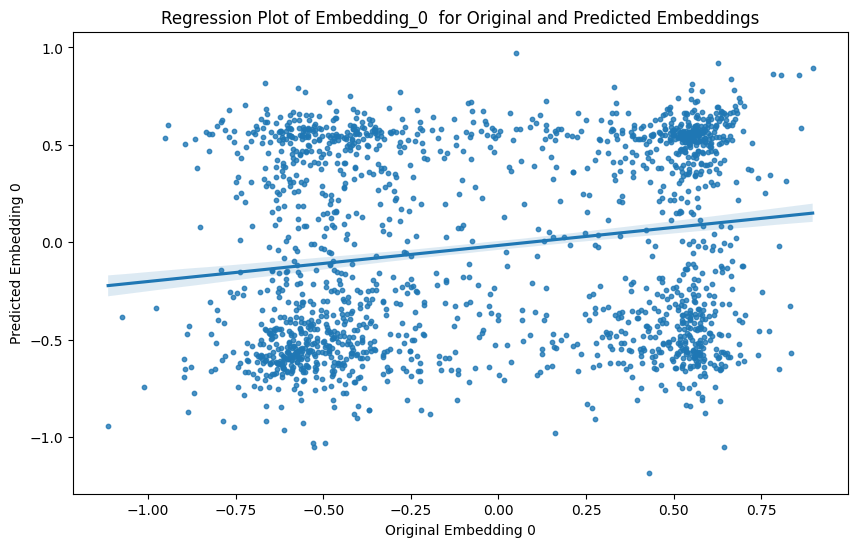

Pearson Correlation: 0.1866


In [55]:
col_comparison(0)

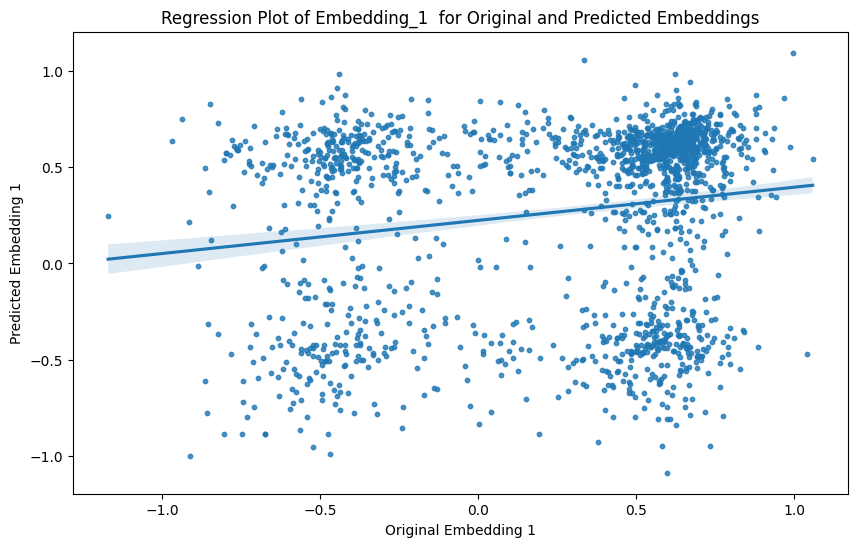

Pearson Correlation: 0.1720


In [56]:
col_comparison(1)

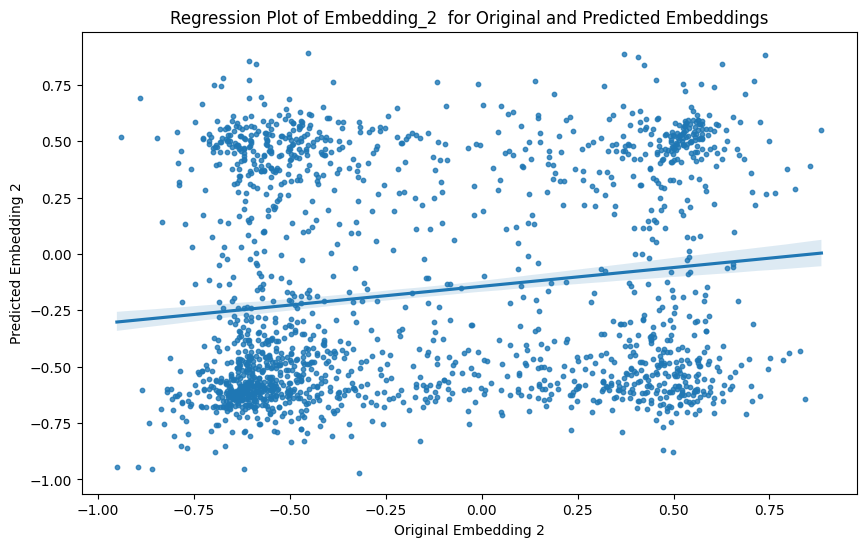

Pearson Correlation: 0.1651


In [57]:
col_comparison(2)

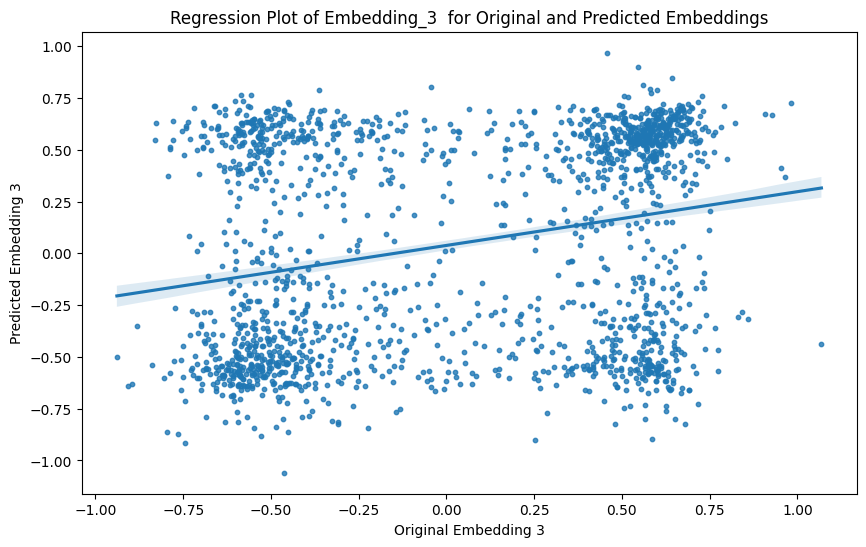

Pearson Correlation: 0.2604


In [58]:
col_comparison(3)

In [59]:
def row_comparison(drug_index, original_embeddings=y_test, predicted_embeddings=y_pred):
    '''Function to compare the 400 original embeddings with the predicted embeddings for a drug
    It uses a regression plot and Pearson correlation for comparison.
        
    Parameter
    ----------
    drug_index (int): number specifying the drug embedding you want to compare. It ranges from 0-1761.
    original_embeddings (np.array): The original embeddings from the knowledge graph.
    predicted_embeddingns (np.array): The embeddings predicted by the model
    
    Returns
    -------
    pearson_corr (np.array): person correlation score.
    '''
    # Extract embeddings for the specified drug
    embeddings_y_test = original_embeddings[drug_index]
    embeddings_mf = predicted_embeddings[drug_index]

    # Create a DataFrame for Seaborn plotting
    df = pd.DataFrame({'Embeddings_y_test': embeddings_y_test,
                       'Embeddings_mf': embeddings_mf})

    # Plot the regression plot
    plt.figure(figsize=(10, 6))
    sns.regplot(x='Embeddings_y_test', y='Embeddings_mf', data=df, scatter_kws={'s': 10})
    plt.title(f'Regression Plot of Embeddings for Drug {drug_index}')
    plt.xlabel(f'Original Embeddings for Drug {drug_index}')
    plt.ylabel(f'Predicted Embeddings for Drug {drug_index}')
    plt.show()

     # Calculate the Pearson correlation
    pearson_corr = np.corrcoef(embeddings_y_test, embeddings_mf)[0, 1]
    print(f'Pearson Correlation: {pearson_corr:.4f}')

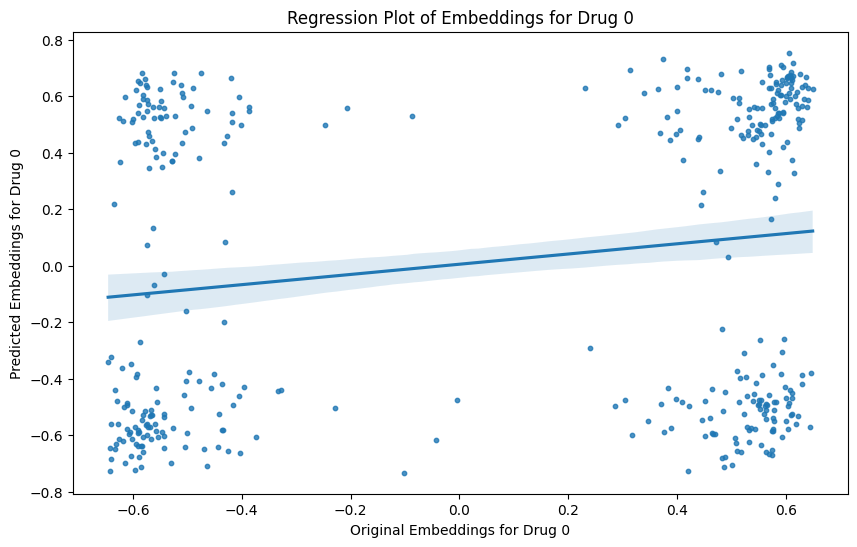

Pearson Correlation: 0.1788


In [60]:
row_comparison(0)

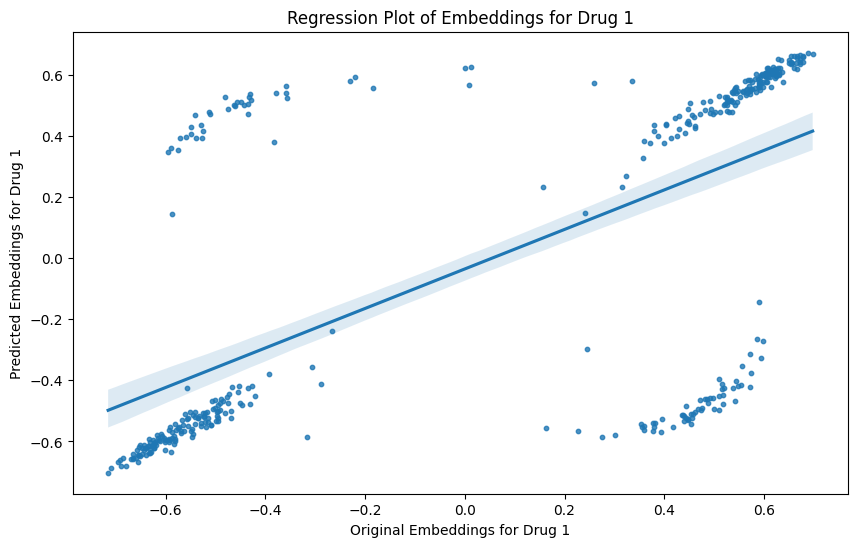

Pearson Correlation: 0.6450


In [61]:
row_comparison(1)

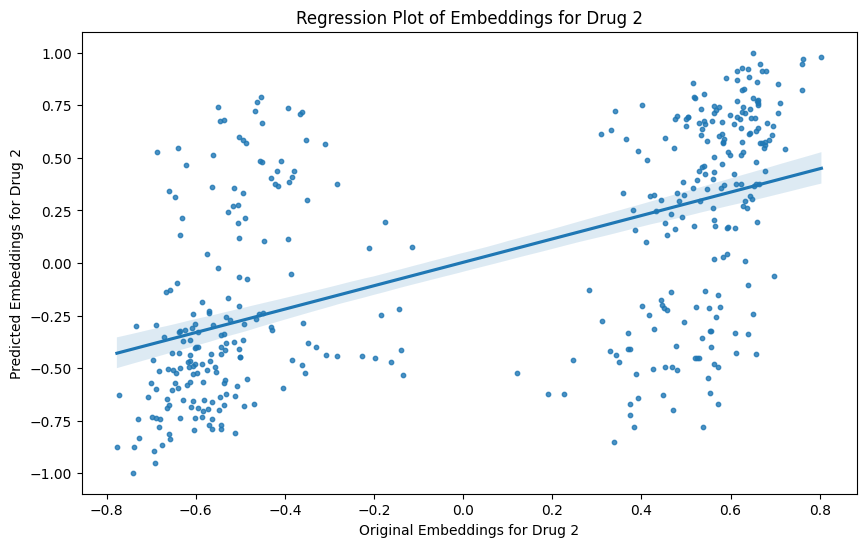

Pearson Correlation: 0.5673


In [62]:
row_comparison(2)

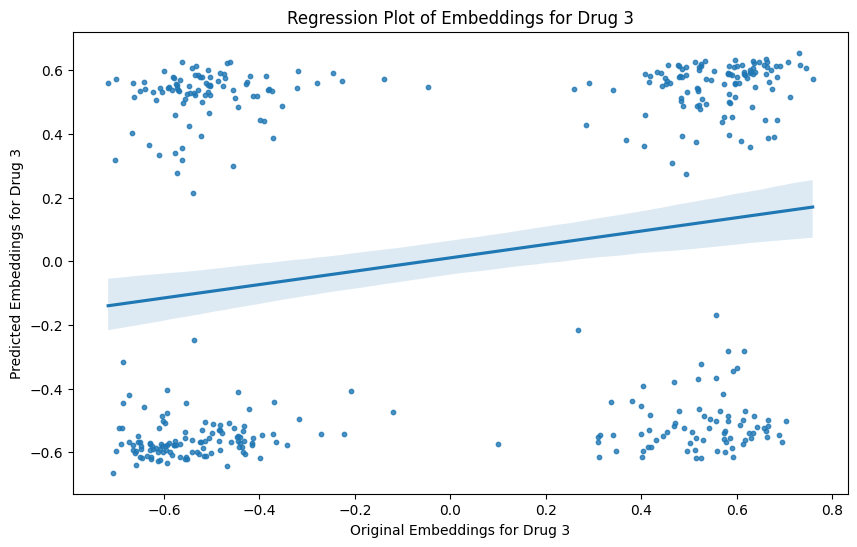

Pearson Correlation: 0.2109


In [63]:
row_comparison(3)

### Save Model

In [64]:
# Save the trained model to a file
joblib.dump(knn_model, 'knn_model_1n.joblib')
# loaded_knn_model = joblib.load('knn_model_1n.joblib')

['knn_model_1n.joblib']